# 1- Import Used Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats 
#sns.set(rc={'figure.figsize':(10,8 )})

# 2- Reading Data

In [2]:
data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Check Duplicates

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Get number of unique values for all cloumns


In [11]:
# will print output as dictionary form, formats the specified values and insert them inside the string's placeholder {} 
for col in data.columns:
    print('{} : {}'.format(col,data[col].nunique()))

instant : 17379
dteday : 731
season : 4
yr : 2
mnth : 12
hr : 24
holiday : 2
weekday : 7
workingday : 2
weathersit : 4
temp : 50
atemp : 65
hum : 89
windspeed : 30
casual : 322
registered : 776
cnt : 869


In [12]:
data.describe(include = 'O')

,dteday
count,17379
unique,731
top,2011-04-15
freq,24


# Columns To Keep

In [13]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
columns_used = ['instant','dteday','season','hr','holiday','weekday','workingday',
               'weathersit','temp','atemp','hum','windspeed','cnt']

In [15]:
data = data[columns_used].copy()

In [16]:
data.shape

(17379, 13)

In [17]:
data.columns

Index(['instant', 'dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Check Nulls

In [18]:
data.isnull().sum() / data.shape[0] *100

instant       0.0
dteday        0.0
season        0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

# Analysis

In [19]:
data['dteday'] = pd.to_datetime(data['dteday'],errors = 'coerce')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   hr          17379 non-null  int64         
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  int64         
 6   workingday  17379 non-null  int64         
 7   weathersit  17379 non-null  int64         
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 1.9 MB


In [21]:
data.head()

,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [22]:
data['Year'] = data['dteday'].dt.year
data['Month'] = data['dteday'].dt.month
data['Day'] = data['dteday'].dt.day

In [23]:
data.head()

,instant,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Year,Month,Day
0,1,2011-01-01,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,2011,1,1
1,2,2011-01-01,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,2011,1,1
2,3,2011-01-01,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,2011,1,1
3,4,2011-01-01,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,2011,1,1
4,5,2011-01-01,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,2011,1,1


In [24]:
data['Year'].unique()

array([2011, 2012], dtype=int64)

In [25]:
data['Year'].value_counts()

2012    8734
2011    8645
Name: Year, dtype: int64

In [26]:
data['Month'].nunique()

12

In [27]:
data['Month'].value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: Month, dtype: int64

In [28]:
data['Day'].nunique()

31

In [29]:
data.columns

Index(['instant', 'dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year',
       'Month', 'Day'],
      dtype='object')

In [30]:
# get the highest year in cnt
data.groupby('Year')['cnt'].max().sort_values(ascending = False).head(1)

Year
2012    977
Name: cnt, dtype: int64

In [31]:
# get the highest month in cnt
data.groupby('Month')['cnt'].max().sort_values(ascending = False).head(1)

Month
9    977
Name: cnt, dtype: int64

In [32]:
# get the highest hour in cnt
data.groupby('hr')['cnt'].max().sort_values(ascending = False).head(1)

hr
18    977
Name: cnt, dtype: int64

In [33]:
data.columns

Index(['instant', 'dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year',
       'Month', 'Day'],
      dtype='object')

In [34]:
data['season'].nunique()

4

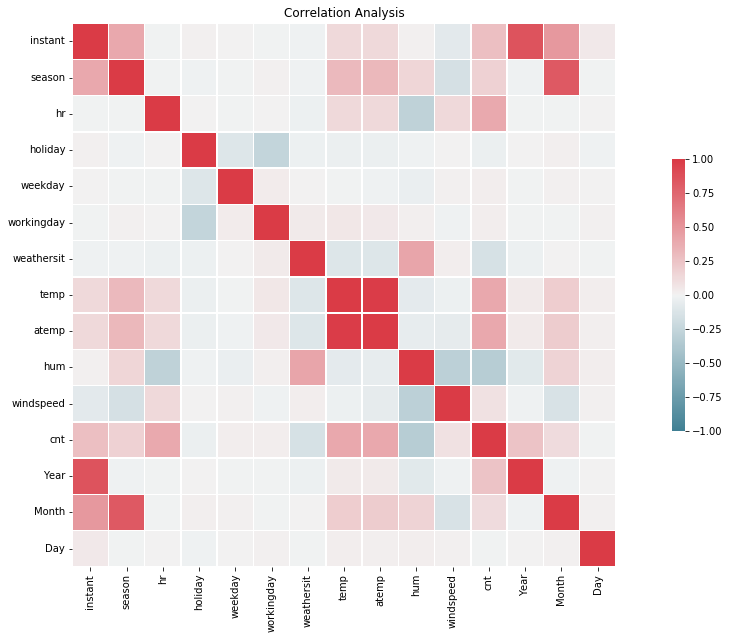

In [35]:
# correlation matrix and heatmap
#corr_matrix = data.corr()
mask = np.triu(np.ones_like(data.corr(),dtype = bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Analysis");

In [36]:
# func that draw histogram for numerical variables
def feature_distribution(col_name) :
    plt.figure()
    sns.histplot(data[col_name], bins = 30)
    plt.xlabel(col_name.upper())
    plt.ylabel('Count')
    plt.title(f'Distribution Of {col_name}')
plt.show()

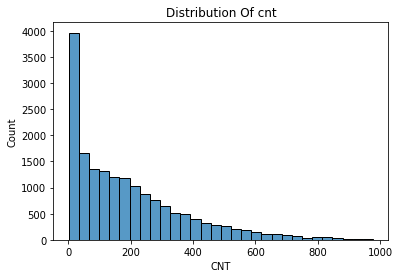

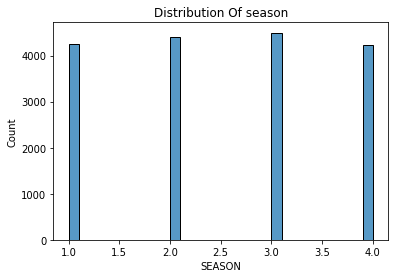

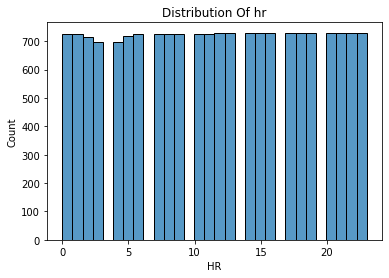

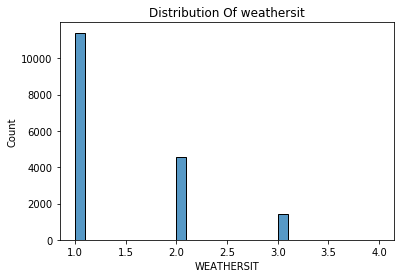

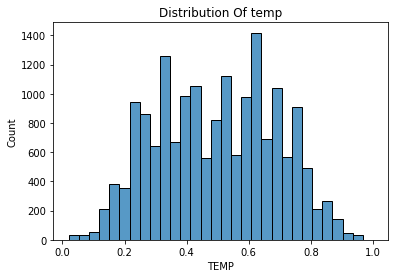

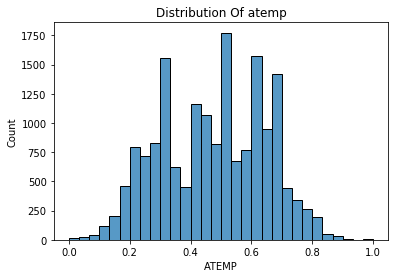

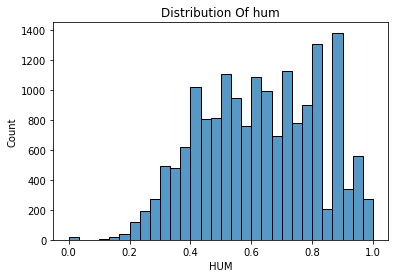

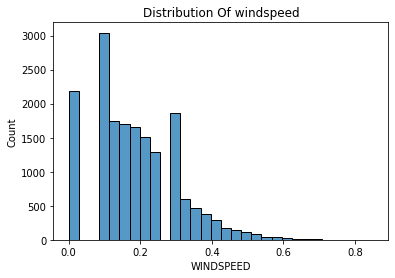

In [37]:
columns2draw = ['cnt','season','hr',
               'weathersit','temp','atemp','hum','windspeed']
for col in columns2draw :
    feature_distribution(col)

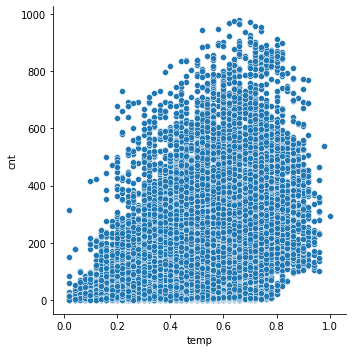

In [38]:
sns.relplot(data = data, x = 'temp', y = 'cnt', kind = 'scatter');

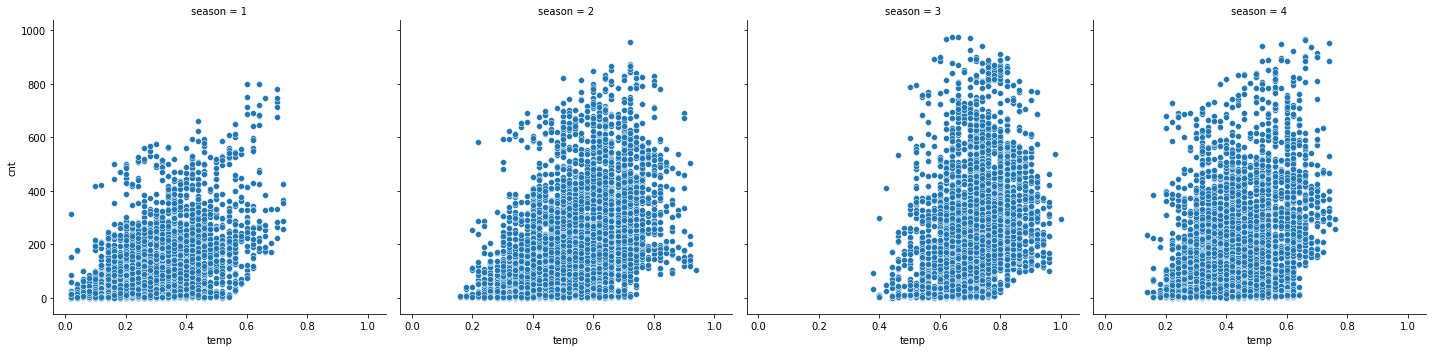

In [39]:
# temp and cnt
sns.relplot(data = data, x = 'temp', y = 'cnt', col = 'season', kind = 'scatter');

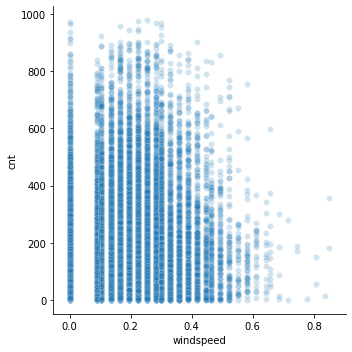

In [40]:
# wind speed with cnt
sns.relplot(data = data, x = 'windspeed', y = 'cnt', kind = 'scatter', alpha = 0.2);

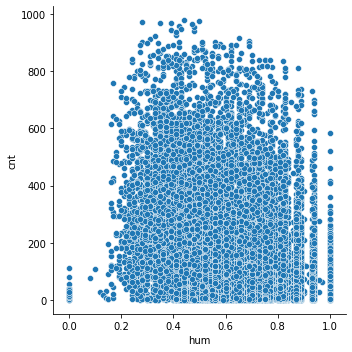

In [41]:
# temperature VS y
sns.relplot(data = data, x = 'hum', y = 'cnt', kind = 'scatter');

In [42]:
data.columns

Index(['instant', 'dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year',
       'Month', 'Day'],
      dtype='object')

C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


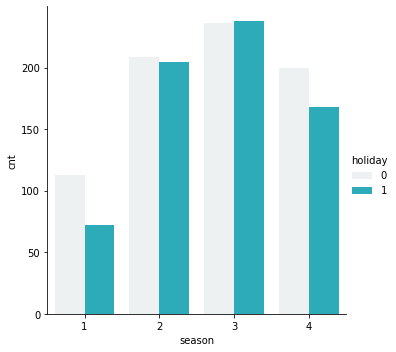

In [43]:
color = sns.color_palette()[9]
sns.catplot(data = data, x = 'season', y = 'cnt', hue = 'holiday', kind = 'bar', ci = None, color = color)

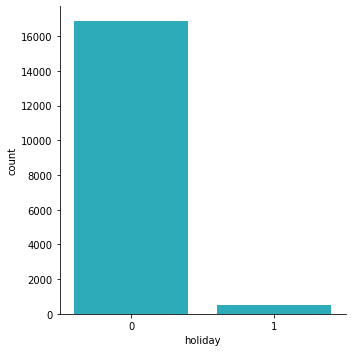

In [44]:
sns.catplot(data = data, x = 'holiday', kind = 'count', ci = None, color = color)

In [45]:
data.columns

Index(['instant', 'dteday', 'season', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year',
       'Month', 'Day'],
      dtype='object')

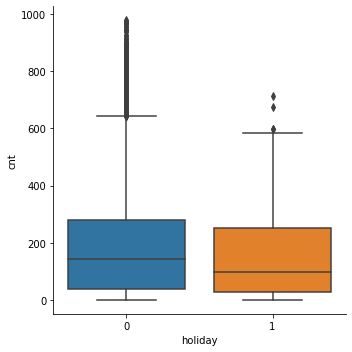

In [46]:
sns.catplot(data = data, x = 'holiday', y = 'cnt', kind = 'box', ci = None)

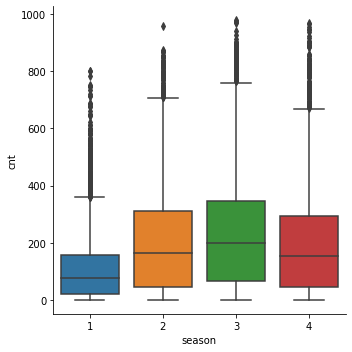

In [47]:
sns.catplot(data = data, x = 'season', y = 'cnt', kind = 'box', ci = None)

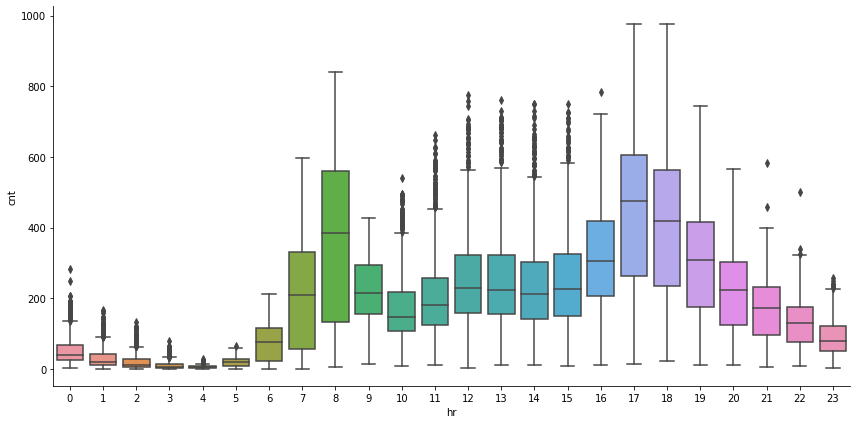

In [48]:
sns.catplot(data = data, x = 'hr', y = 'cnt', kind = 'box', ci = None, height = 6, aspect = 2)

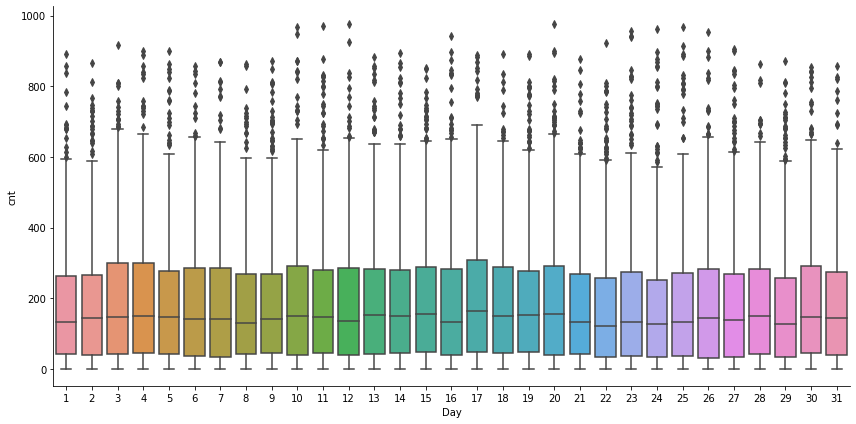

In [49]:
sns.catplot(data = data, x = 'Day', y = 'cnt', kind = 'box', ci = None, height = 6, aspect = 2)

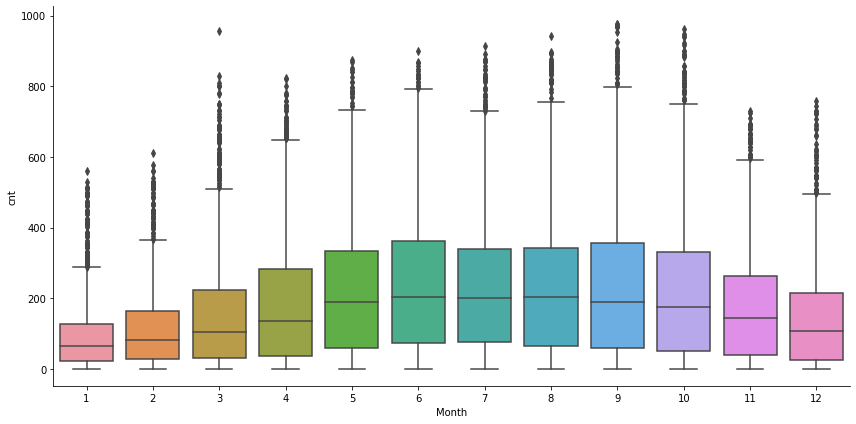

In [50]:
sns.catplot(data = data, x = 'Month', y = 'cnt', kind = 'box', ci = None, height = 6, aspect = 2)

In [51]:
def sns_hist(data,title):
    """"
    Function to plot seaborn histogram.
    """
    
    
    sns.distplot(data)
    plt.title(title)
    plt.ylabel('Density')

C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


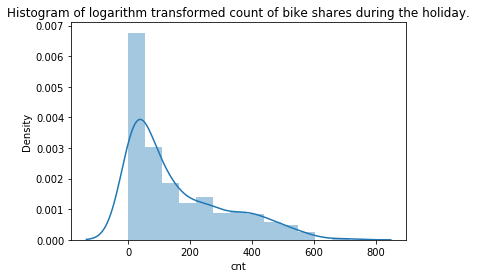

In [52]:
sns_hist(data[data['holiday']==1]['cnt'],"Histogram of logarithm transformed count of bike shares during the holiday.")

C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


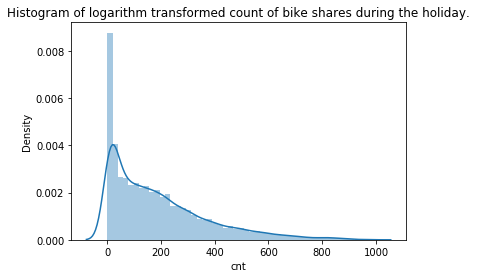

In [53]:
sns_hist(data[data['holiday']==0]['cnt'],"Histogram of logarithm transformed count of bike shares during the holiday.")

C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


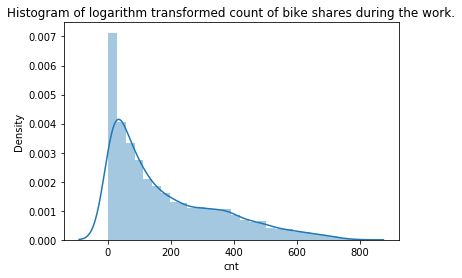

In [54]:
sns_hist(data[data['workingday']==0]['cnt'],"Histogram of logarithm transformed count of bike shares during the work.")

C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


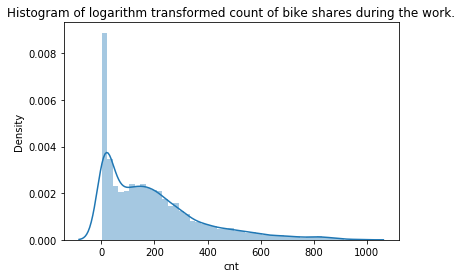

In [55]:
sns_hist(data[data['workingday']==1]['cnt'],"Histogram of logarithm transformed count of bike shares during the work.")

C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until


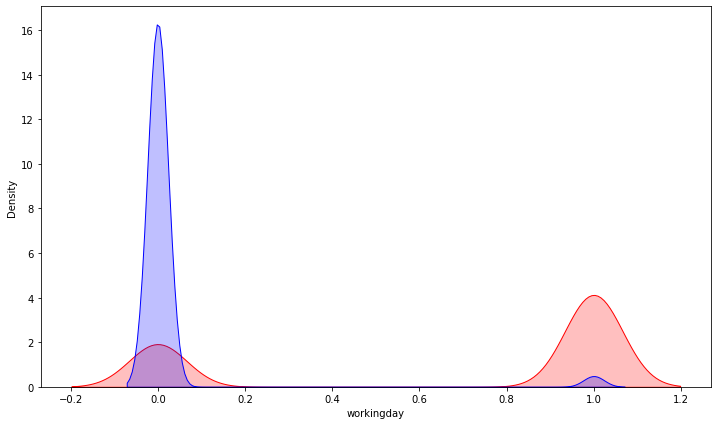

In [56]:
plt.figure(figsize=(12,7))
sns.kdeplot(data['workingday'],shade = True, color = 'r');
sns.kdeplot(data['holiday'], shade = True, color = 'b');

C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
C:\Users\asd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


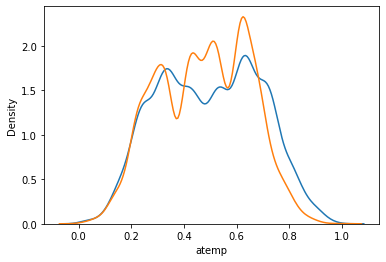

In [57]:
sns.distplot(data['temp'],hist = False, label= 'temp')
sns.distplot(data['atemp'],hist = False, label= 'atemp')
plt.show()
# highly corelated

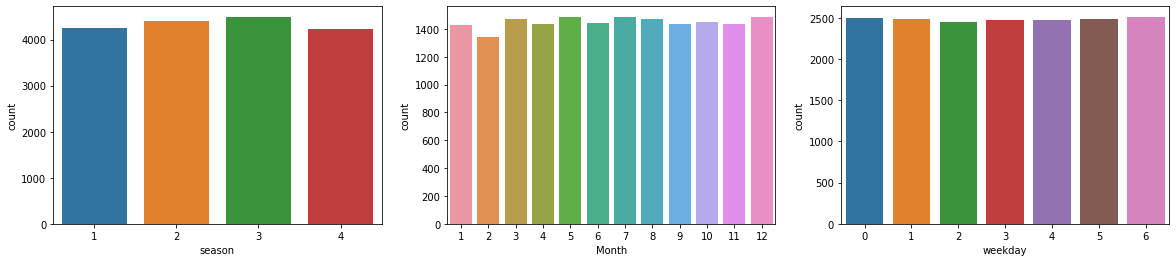

In [58]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'season', data = data)
plt.subplot(132)
sns.countplot(x= 'Month', data = data)
plt.subplot(133)
sns.countplot(x= 'weekday', data = data)
plt.show()


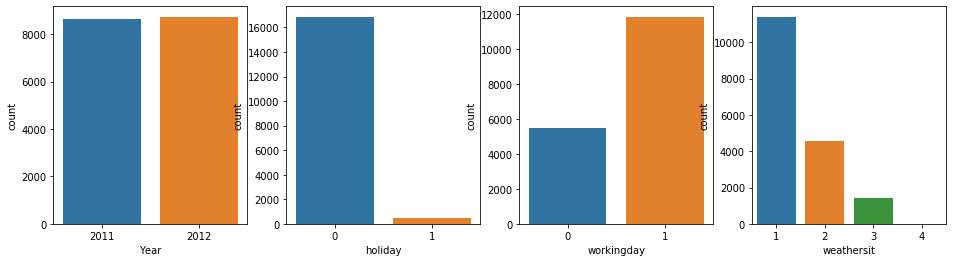

In [59]:
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.countplot(x= 'Year', data = data)
plt.subplot(142)
sns.countplot(x= 'holiday', data = data)
plt.subplot(143)
sns.countplot(x= 'workingday', data = data)
plt.subplot(144)
sns.countplot(x= 'weathersit', data = data)
plt.show()

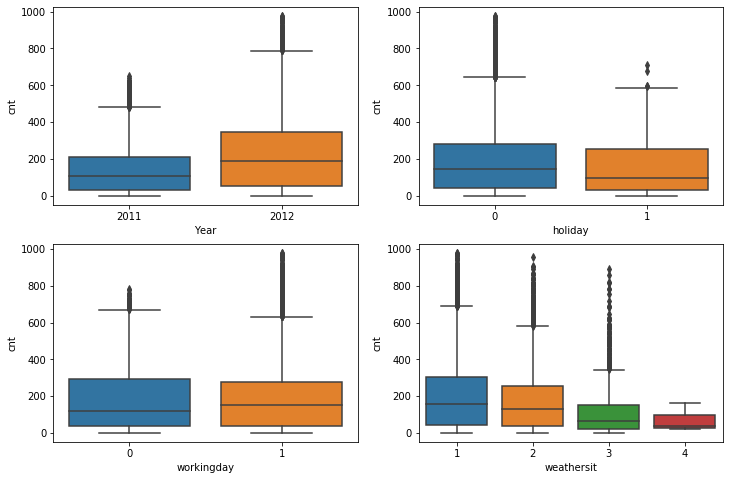

In [60]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x = 'Year', y = 'cnt', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

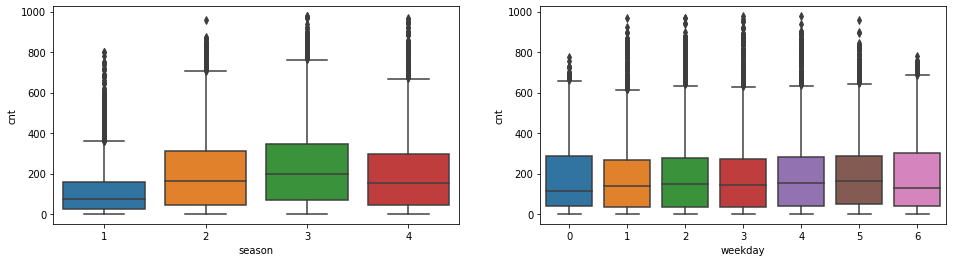

In [61]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(122)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

# Data Preprocessing

In [62]:
def drop_useless_features(df, cols) :
    df.drop(columns = cols, axis = 1, inplace = True)
    return df

In [63]:
cols = ['dteday','instant']
data = drop_useless_features(data, cols)

In [64]:
data.columns

Index(['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year', 'Month', 'Day'],
      dtype='object')

In [65]:
data.shape

(17379, 14)

In [66]:
data.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Year,Month,Day
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,2011,1,1
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,2011,1,1
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,2011,1,1
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,2011,1,1
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,2011,1,1


In [67]:
pd.set_option('display.max_columns', 100)
data.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Year,Month,Day
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,2011,1,1
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,2011,1,1
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,2011,1,1
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,2011,1,1
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,2011,1,1


# Encoding

In [68]:
# we don't have categorical data but if we have 
"""
def label_encoding(df, col, map_dict) :
    df[col] = df[col].map(map_dict)
    return df 
"""
"""
data = label_encoding(data, 'colName', {'Yes' : 1, 'No' : 0})
"""

"\ndata = label_encoding(data, 'colName', {'Yes' : 1, 'No' : 0})\n"

## Splitting Data 

In [69]:
data.columns

Index(['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year', 'Month', 'Day'],
      dtype='object')

In [70]:
data.shape

(17379, 14)

In [71]:
features = data.drop('cnt', axis = 1)
target = data['cnt']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=2)
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 2)

In [73]:
X_train.shape,X_valid.shape

((13903, 13), (3476, 13))

In [74]:
X_train.head()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,Year,Month,Day
5841,3,20,1,1,0,3,0.66,0.5909,0.94,0.2537,2011,9,5
3982,2,20,0,0,0,1,0.70,0.6515,0.70,0.1940,2011,6,19
7943,4,15,0,5,1,1,0.42,0.4242,0.41,0.0896,2011,12,2
15113,4,22,0,3,1,3,0.62,0.6061,0.69,0.1940,2012,9,26
16342,4,16,0,0,0,2,0.40,0.4091,0.62,0.3284,2012,11,18


# Scalling Data

In [75]:
data.columns

Index(['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year', 'Month', 'Day'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['temp', 'hum', 'windspeed', 'atemp', 'weathersit','hr']

X_train[cols] = scaler.fit_transform(X_train[cols])
X_valid[cols] = scaler.transform(X_valid[cols])
data[cols] = scaler.transform(data[cols])

In [77]:
print(data.shape, X_train.shape)

(17379, 14) (13903, 13)


# Choose model

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [79]:
models = {'LR' : LinearRegression(), 
          'svm' : SVR(), 
          'DT' : DecisionTreeRegressor(), 
          'RF' : RandomForestRegressor(), 
          'KNN' : KNeighborsRegressor()}

In [80]:
for name, model in models.items() :
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    ## score 
    print('Train Score', r2_score(y_train, model.predict(X_train)))
    print('Validation Score', r2_score(y_valid, y_pred))
    print('Finished')

LR
Train Score 0.3912601617700959
Validation Score 0.3793613992279884
Finished
svm
Train Score -0.06753921315563916
Validation Score -0.07349649048537388
Finished
DT
Train Score 1.0
Validation Score 0.8795390835620079
Finished
RF
Train Score 0.9926425945648877
Validation Score 0.9373328158447236
Finished
KNN
Train Score 0.6661556836399538
Validation Score 0.43919410492984823
Finished


# Best Model

In [94]:
model = RandomForestRegressor(random_state  = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

# Check Prdiction

In [95]:
y_pred.astype(int)[:20]

array([ 10,  45,  52,  49,   5,  87,  28, 323, 229, 172, 162,  22, 151,
       127, 279,  31, 543, 138,  12, 164])

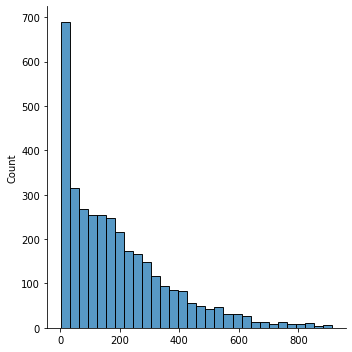

In [96]:
sns.displot(y_pred)

### Saving Model and Scaler

In [97]:
import joblib

joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [98]:
data.columns

Index(['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Year', 'Month', 'Day'],
      dtype='object')

In [99]:
import sys

print(sys.executable)

C:\Users\asd\anaconda3\python.exe
